C:\Users\schac\AppData\Local\Temp\ipykernel_8264\24365404.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4188 entries, 1986-01-01 to 2024-10-01
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GEO                                         4188 non-null   object 
 1   Number_of_Households                        4188 non-null   int64  
 2   Housing completions                         4188 non-null   float64
 3   Housing starts                              4188 non-null   float64
 4   Housing under construction                  4188 non-null   float64
 5   House only NHPI                             4188 non-null   float64
 6   Land only NHPI                              4188 non-null   float64
 7   Total (house and land) NHPI                 4188 non-null   float64
 8   Year                                        4188 non-null   int64  
 9   Month                                       4188 

17:05:14 - cmdstanpy - INFO - Chain [1] start processing
17:05:15 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 1119.16


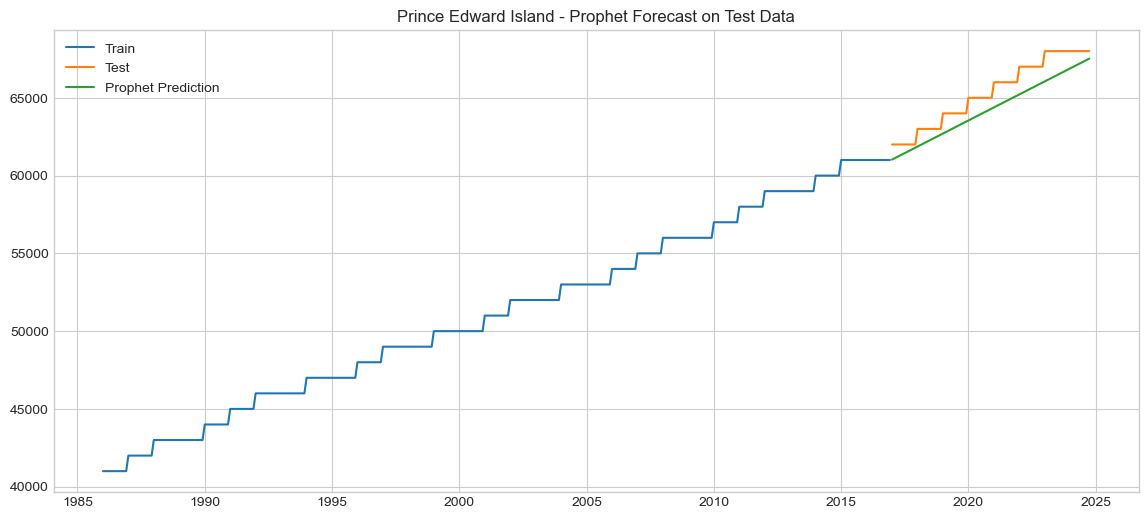

Random Forest RMSE: 5092.60


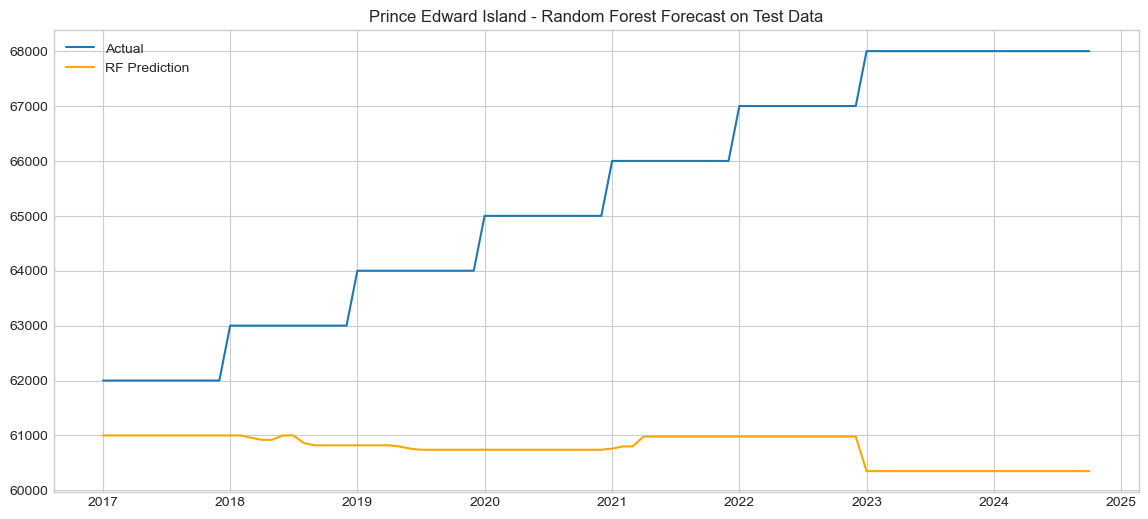

XGBoost RMSE: 4804.70


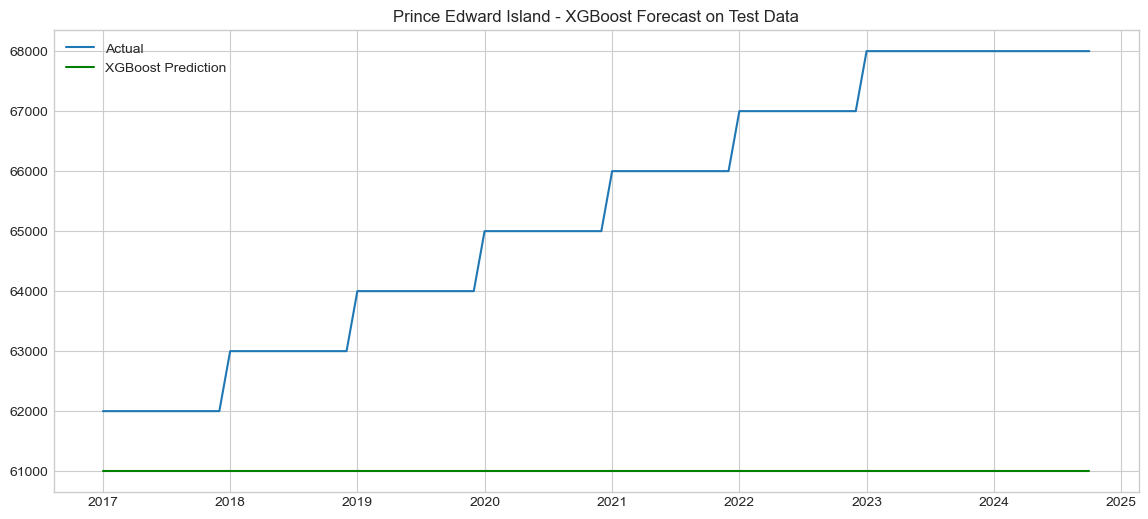

Best model for Prince Edward Island based on RMSE: Prophet


17:05:20 - cmdstanpy - INFO - Chain [1] start processing
17:05:21 - cmdstanpy - INFO - Chain [1] done processing


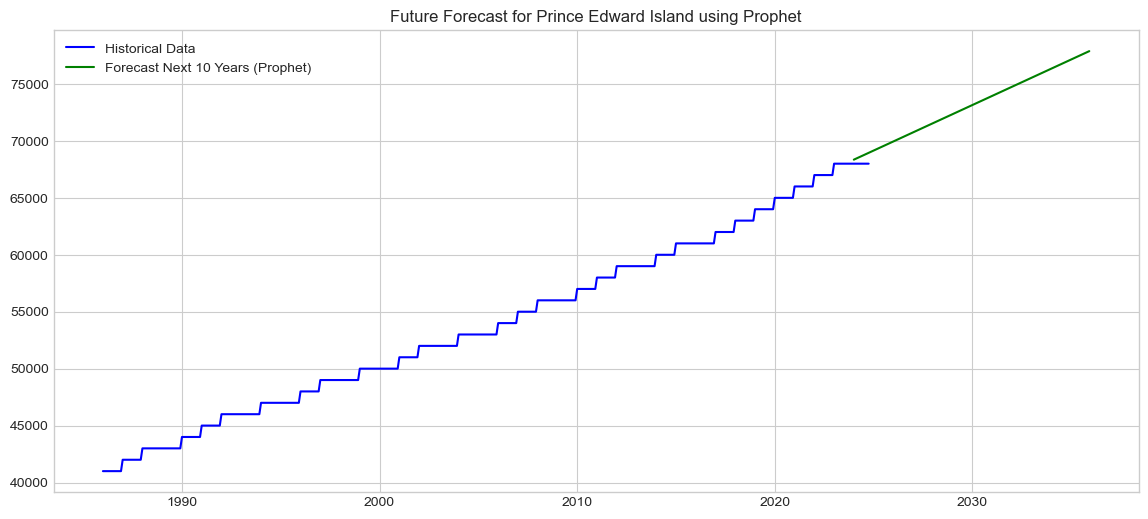


Processing province: Quebec


17:05:22 - cmdstanpy - INFO - Chain [1] start processing
17:05:24 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 19066.84


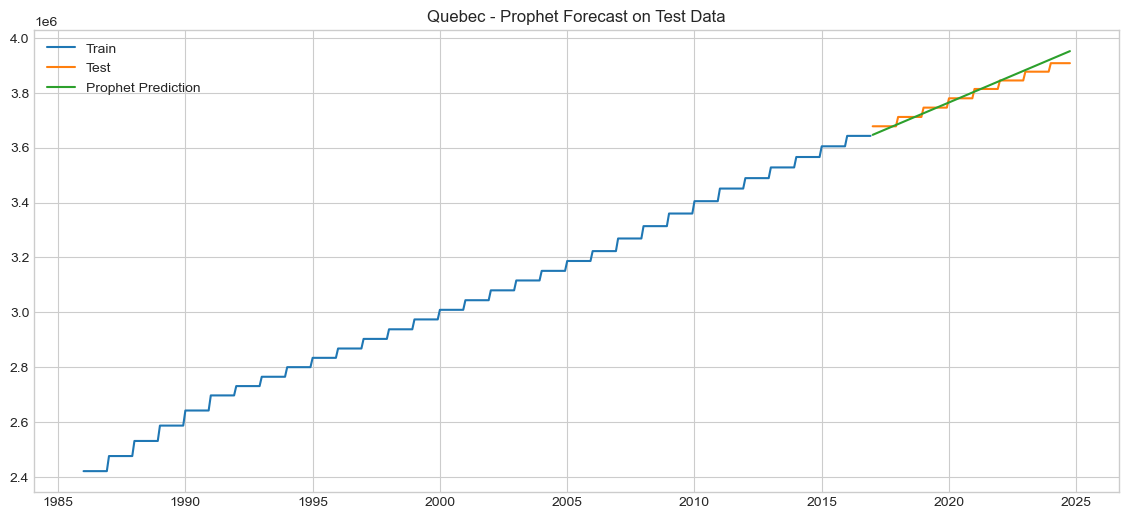

Random Forest RMSE: 169804.91


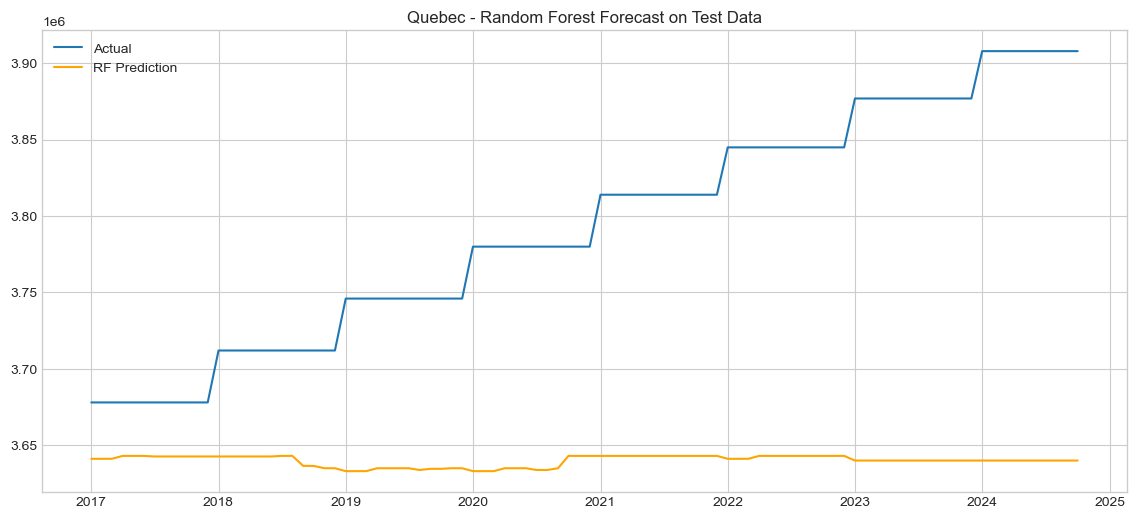

XGBoost RMSE: 167106.61


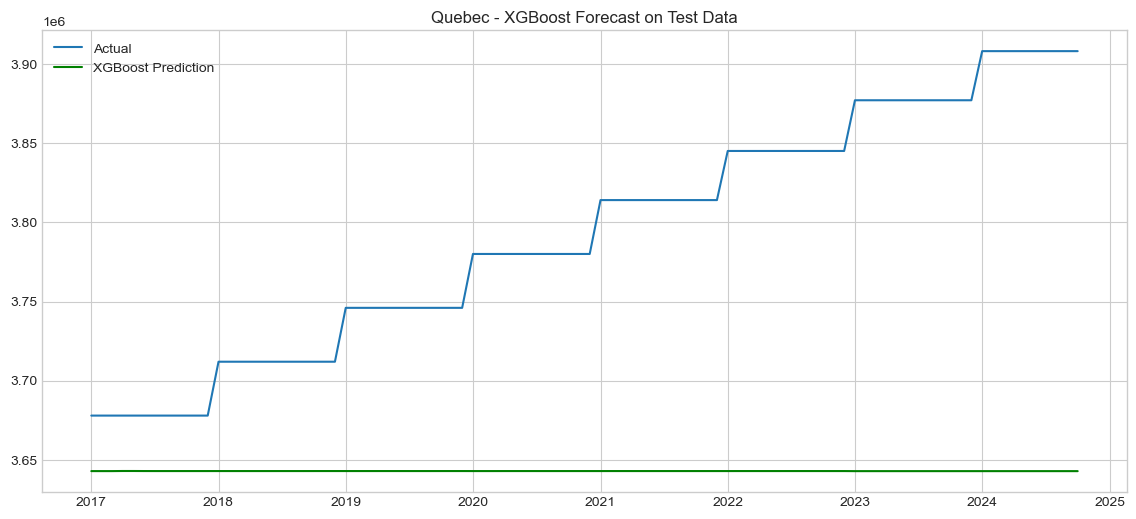

Best model for Quebec based on RMSE: Prophet


17:05:28 - cmdstanpy - INFO - Chain [1] start processing
17:05:30 - cmdstanpy - INFO - Chain [1] done processing


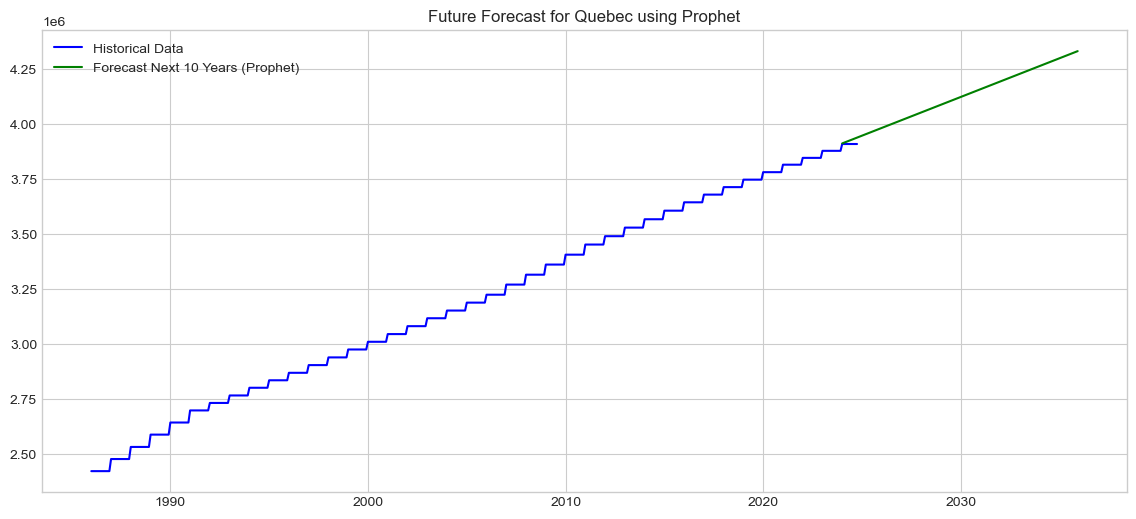


Processing province: Canada


17:05:31 - cmdstanpy - INFO - Chain [1] start processing
17:05:32 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 273389.55


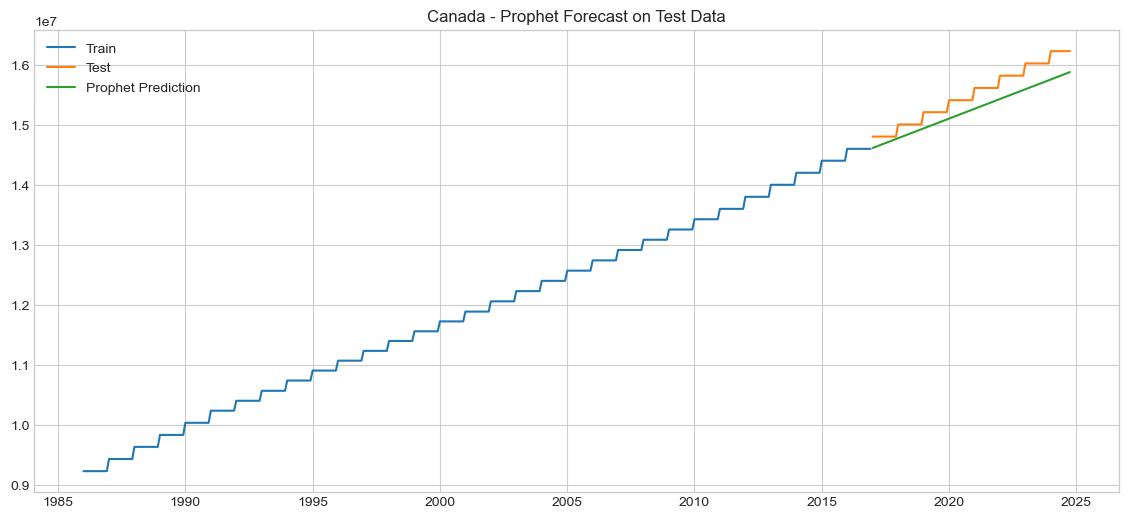

Random Forest RMSE: 1008963.88


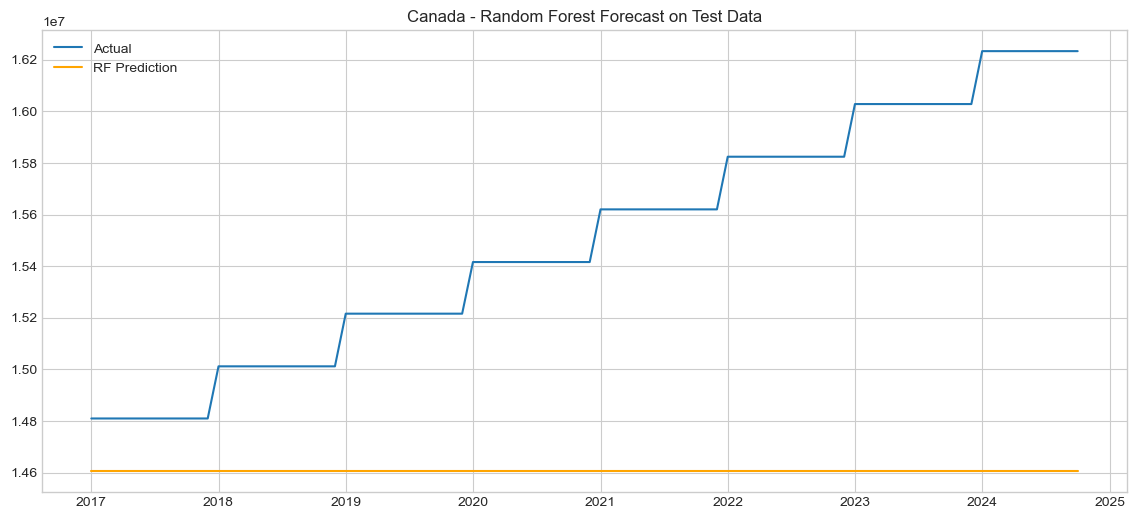

XGBoost RMSE: 1009112.12


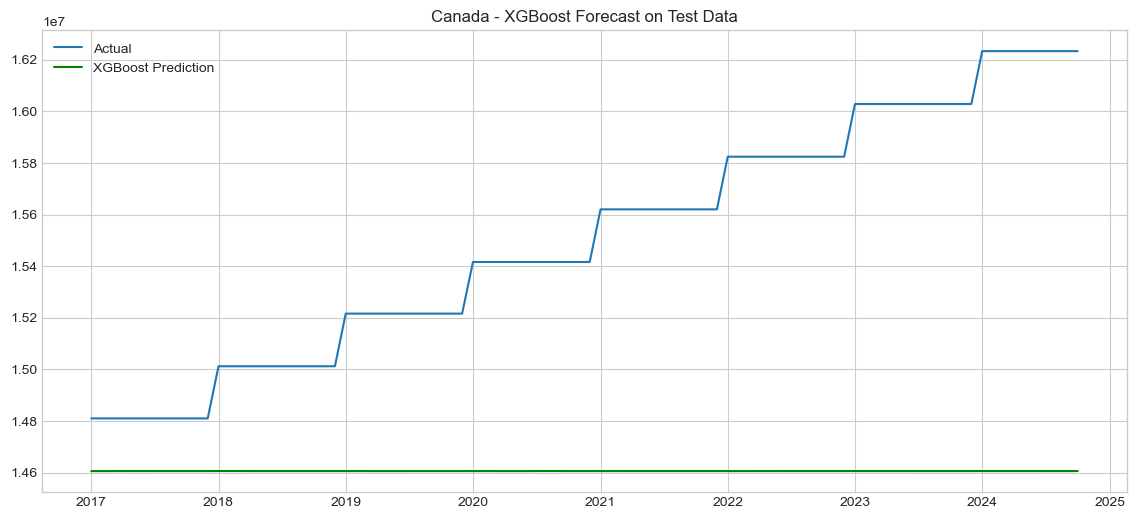

Best model for Canada based on RMSE: Prophet


17:05:38 - cmdstanpy - INFO - Chain [1] start processing
17:05:39 - cmdstanpy - INFO - Chain [1] done processing


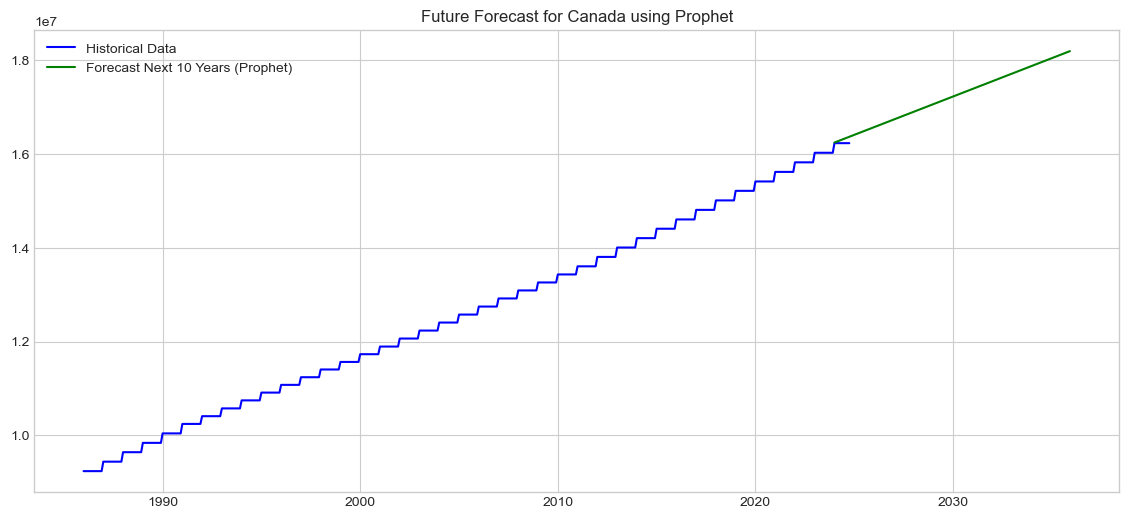


Processing province: Alberta


17:05:40 - cmdstanpy - INFO - Chain [1] start processing
17:05:42 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 56086.67


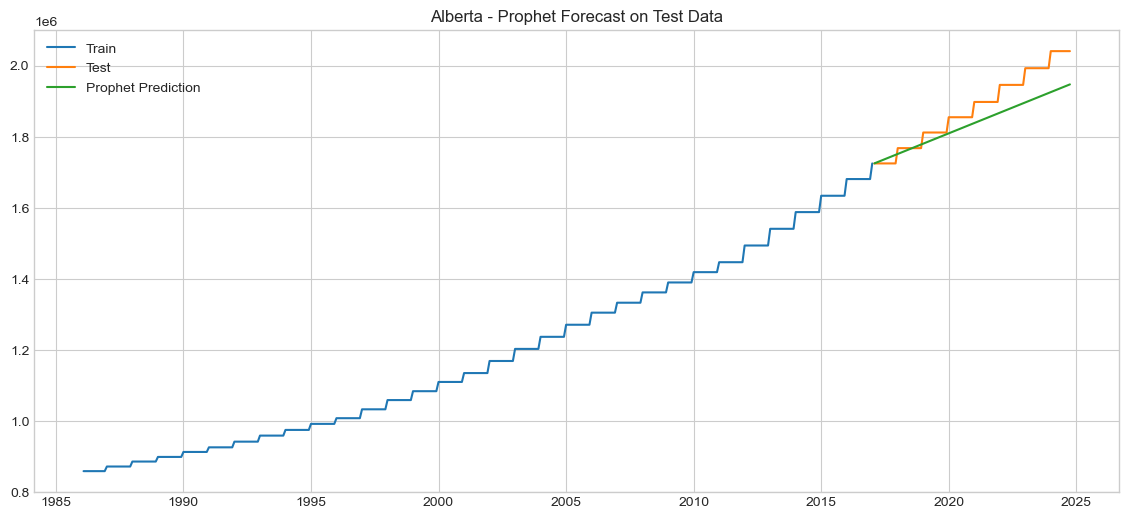

Random Forest RMSE: 212757.31


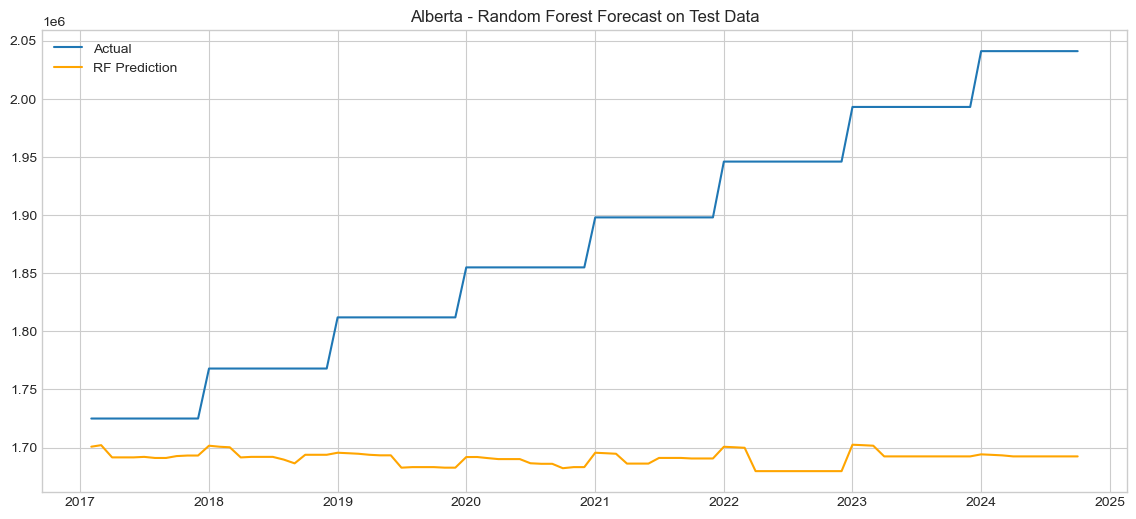

XGBoost RMSE: 220480.94


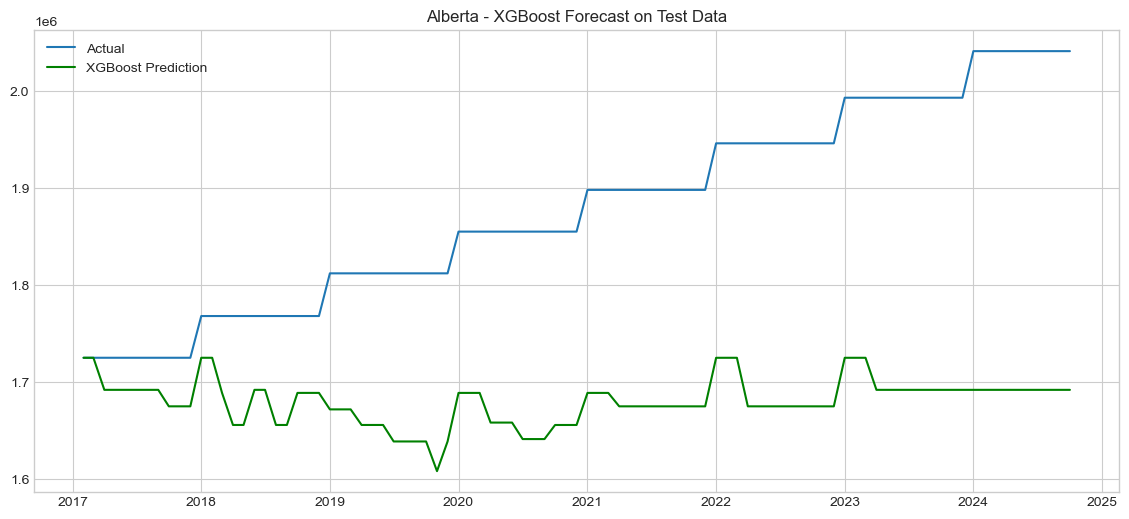

Best model for Alberta based on RMSE: Prophet


17:05:46 - cmdstanpy - INFO - Chain [1] start processing
17:05:48 - cmdstanpy - INFO - Chain [1] done processing


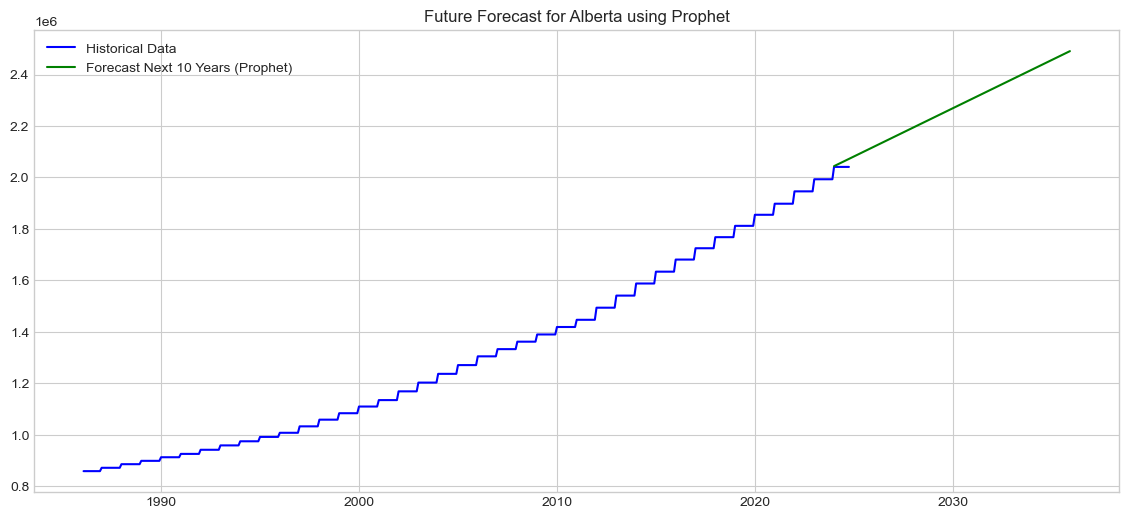


Processing province: British Columbia


17:05:49 - cmdstanpy - INFO - Chain [1] start processing
17:05:51 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 24780.45


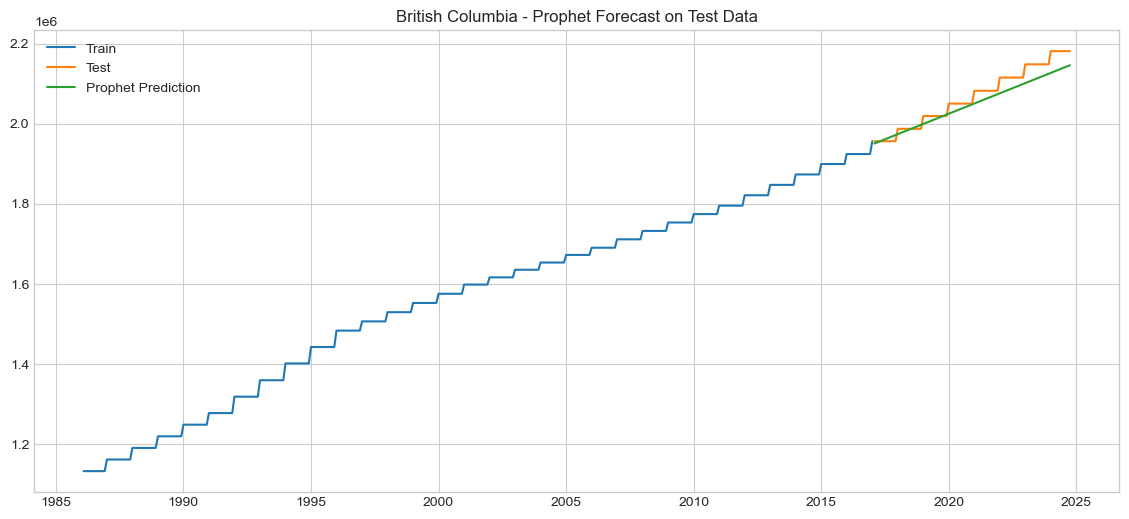

Random Forest RMSE: 168207.28


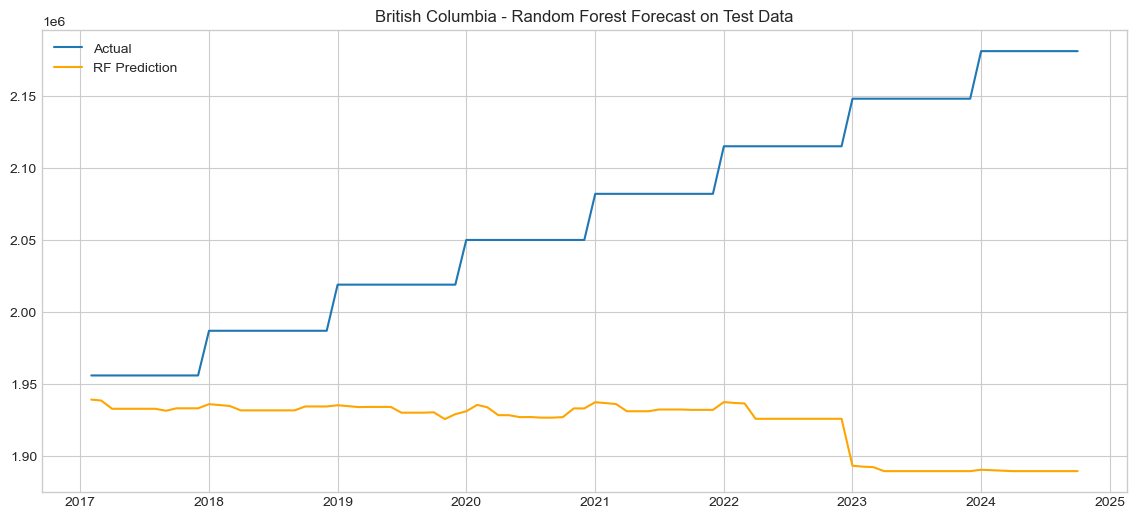

XGBoost RMSE: 152853.65


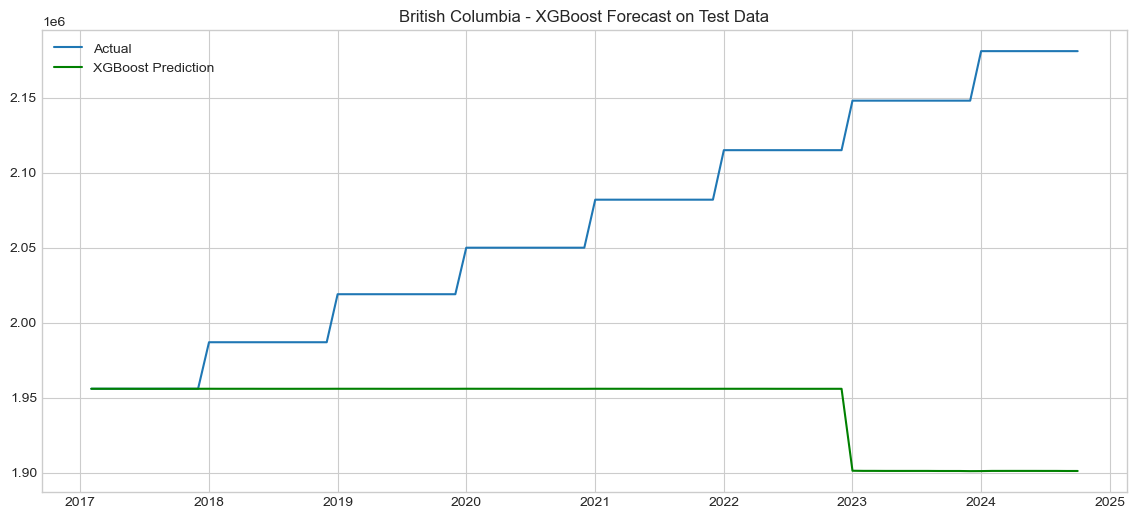

Best model for British Columbia based on RMSE: Prophet


17:05:55 - cmdstanpy - INFO - Chain [1] start processing
17:05:57 - cmdstanpy - INFO - Chain [1] done processing


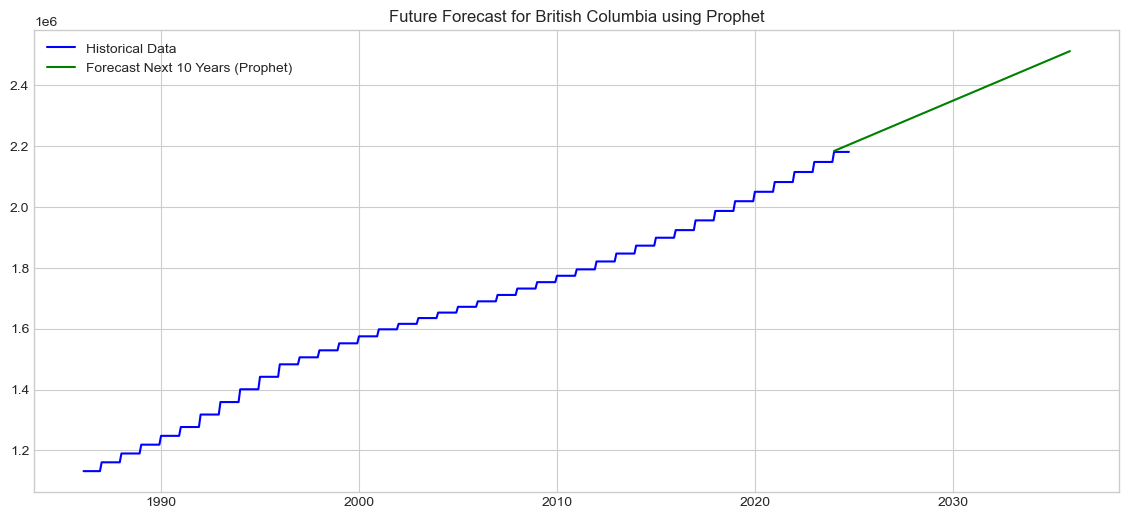


Processing province: Manitoba


17:05:58 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 19175.68


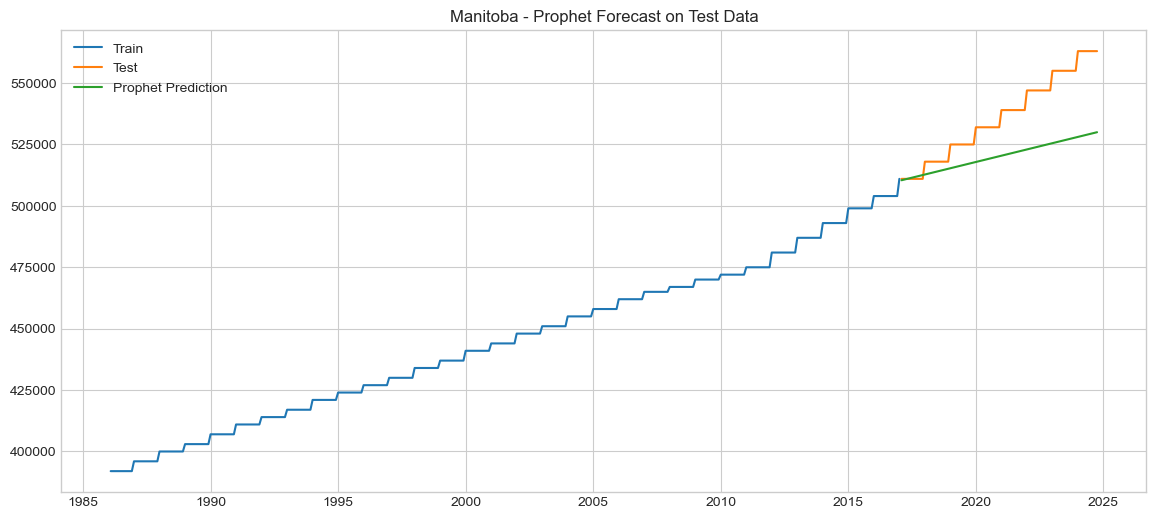

Random Forest RMSE: 33680.77


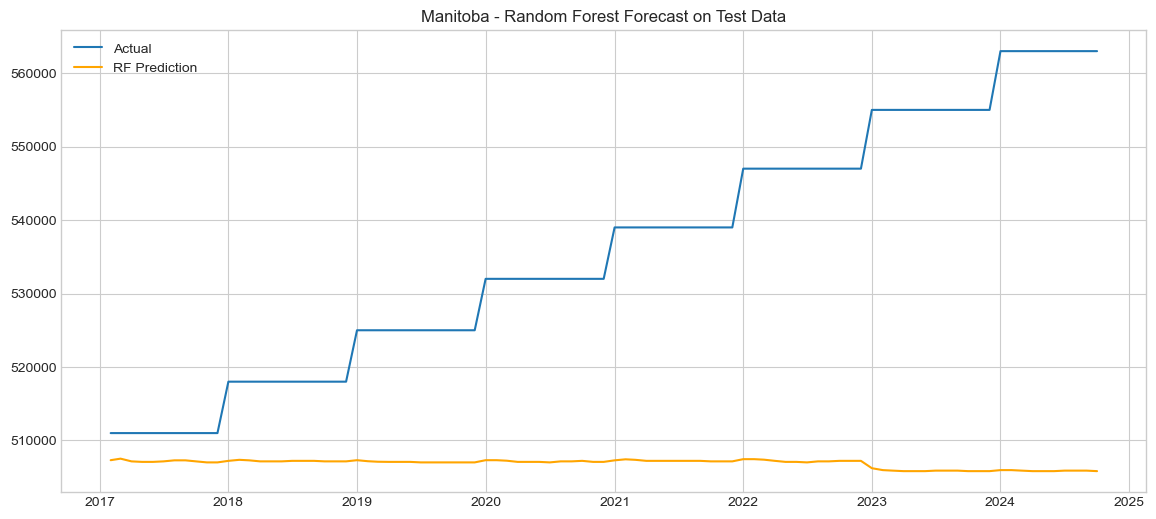

XGBoost RMSE: 29958.28


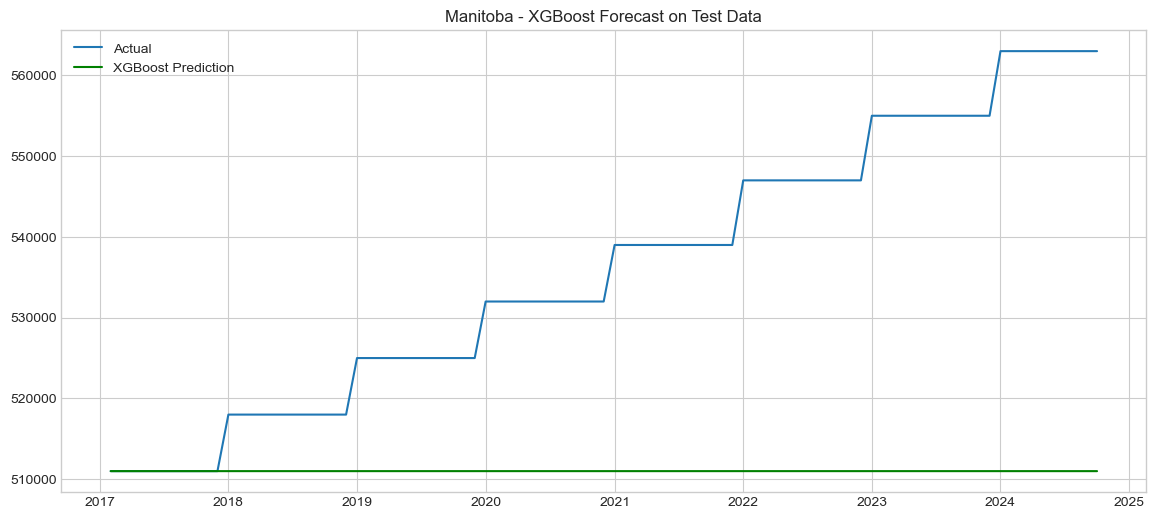

Best model for Manitoba based on RMSE: Prophet


17:06:03 - cmdstanpy - INFO - Chain [1] start processing
17:06:05 - cmdstanpy - INFO - Chain [1] done processing


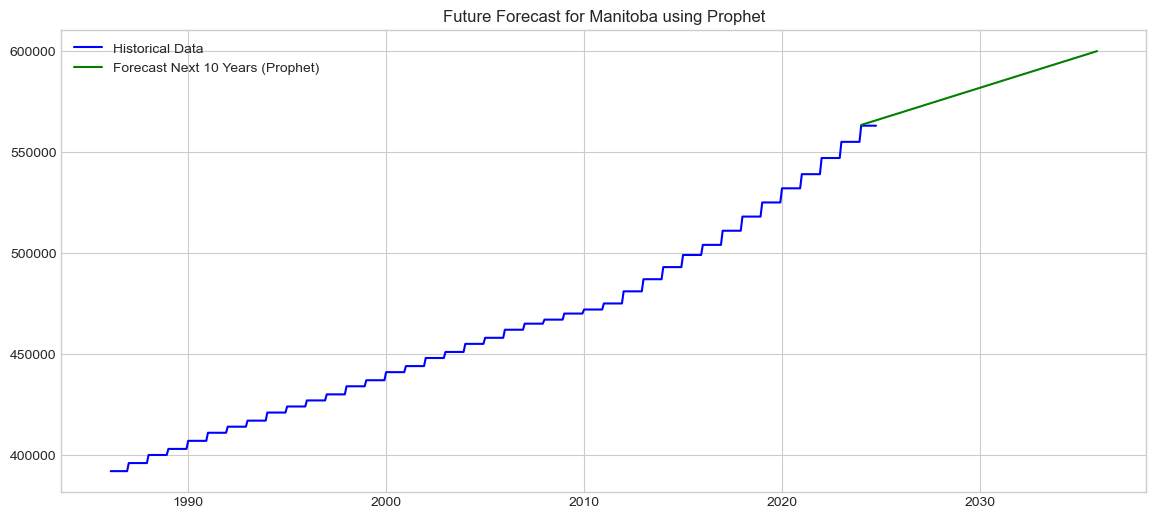


Processing province: New Brunswick


17:06:06 - cmdstanpy - INFO - Chain [1] start processing
17:06:07 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 6339.39


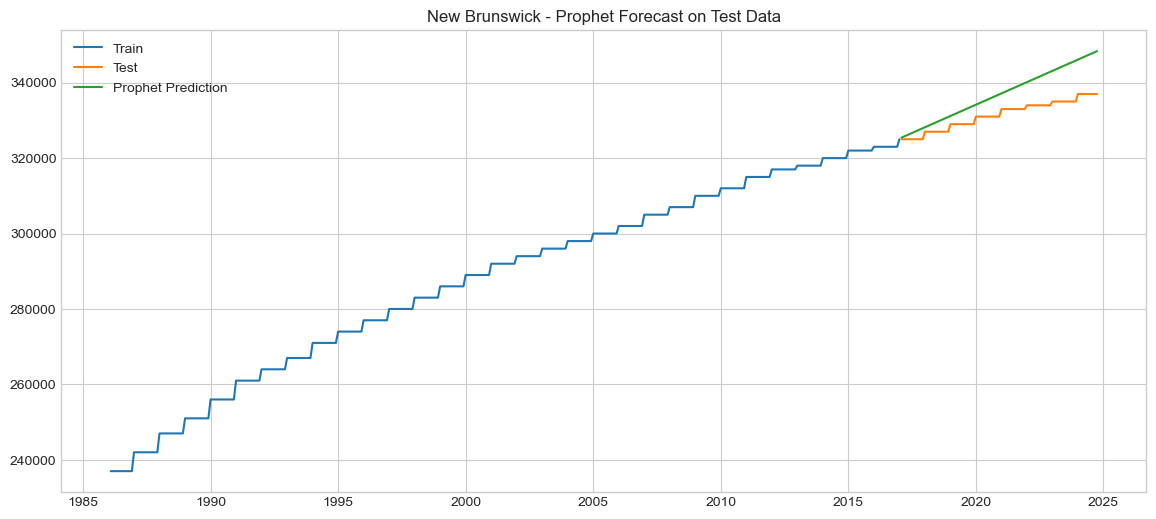

Random Forest RMSE: 9282.43


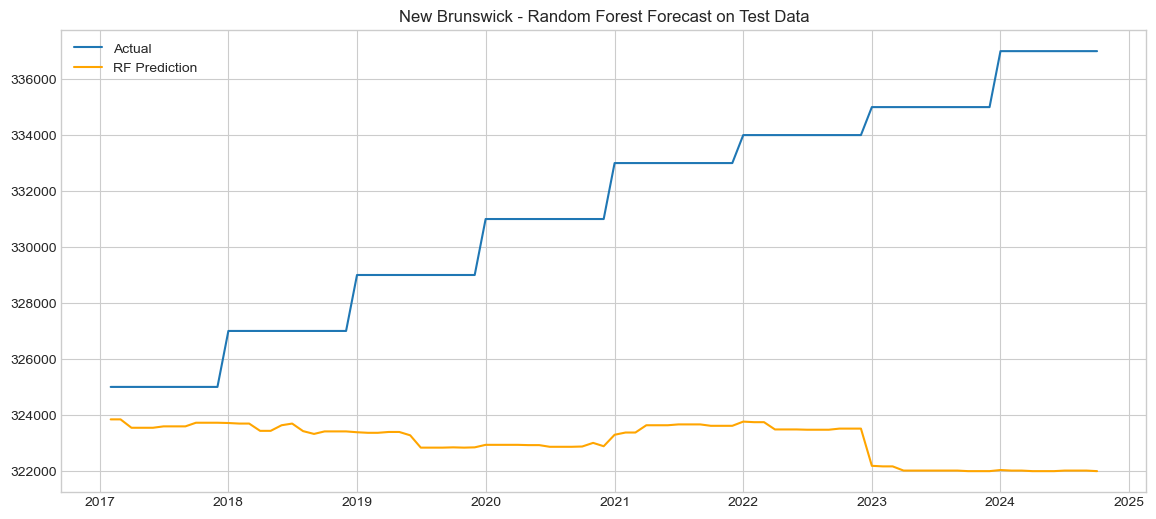

XGBoost RMSE: 8186.81


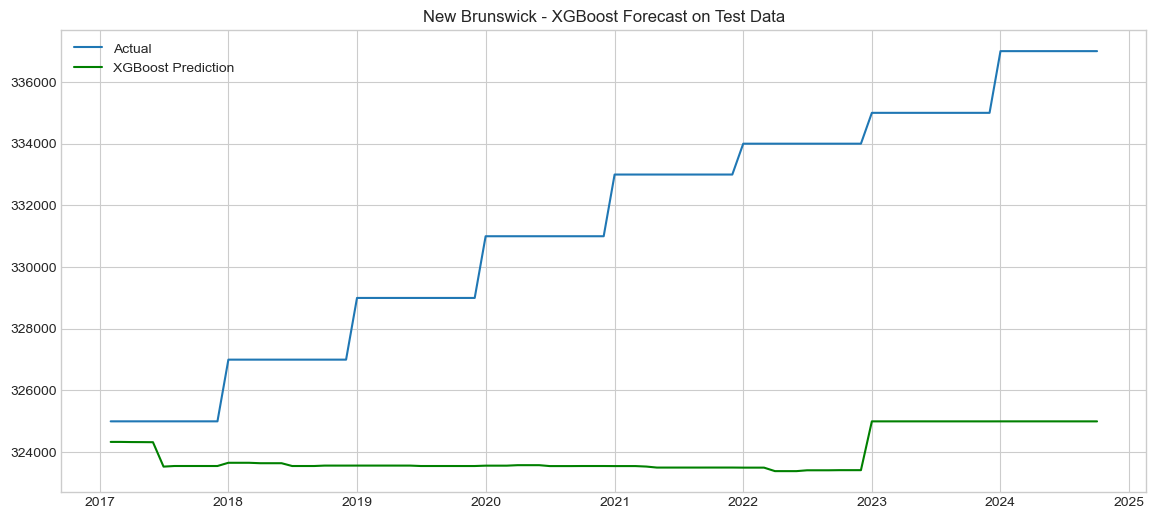

Best model for New Brunswick based on RMSE: Prophet


17:06:12 - cmdstanpy - INFO - Chain [1] start processing
17:06:13 - cmdstanpy - INFO - Chain [1] done processing


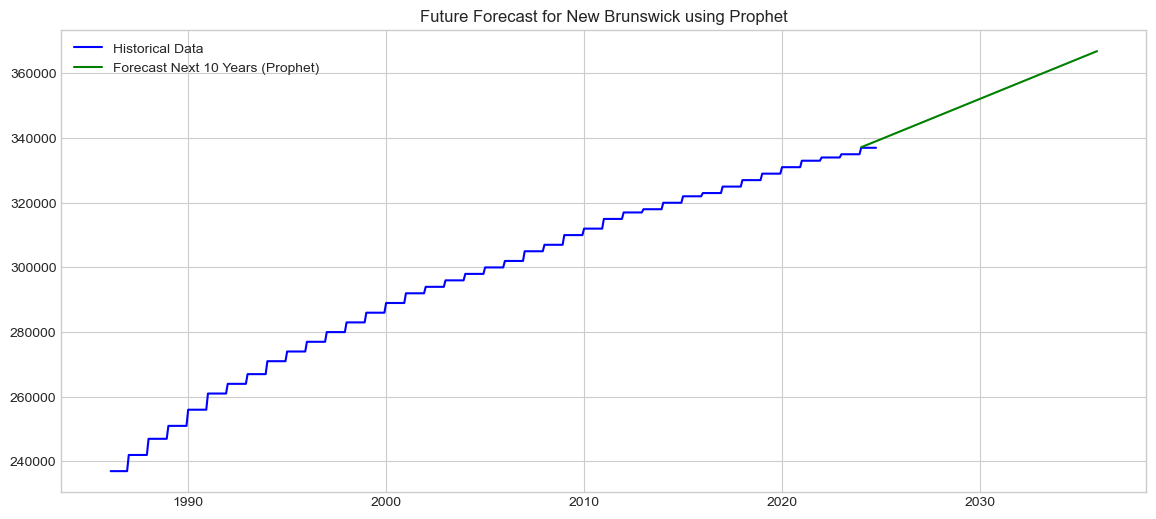


Processing province: Newfoundland and Labrador


17:06:15 - cmdstanpy - INFO - Chain [1] start processing
17:06:16 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 7356.32


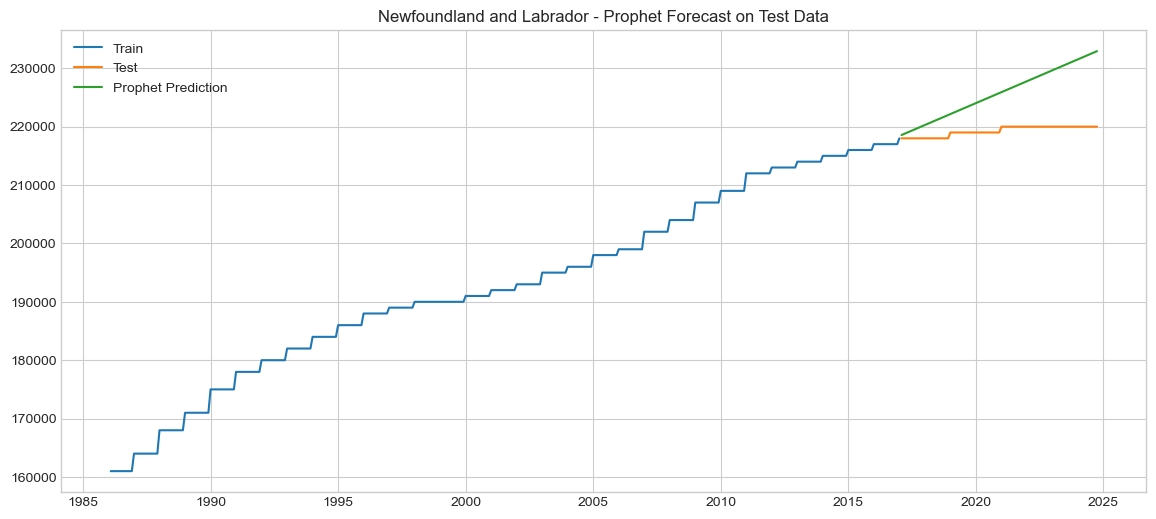

Random Forest RMSE: 2075.62


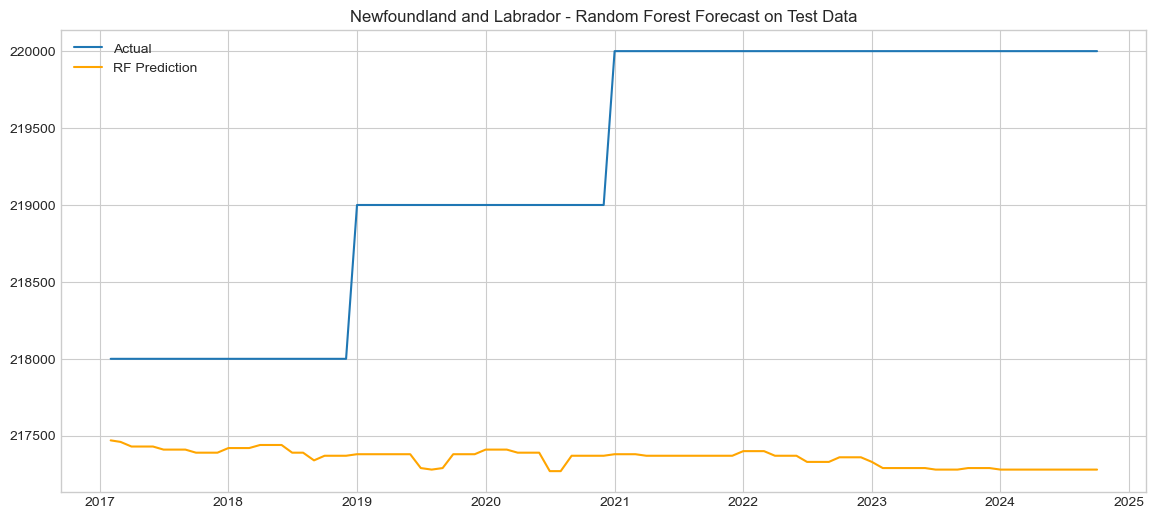

XGBoost RMSE: 1569.29


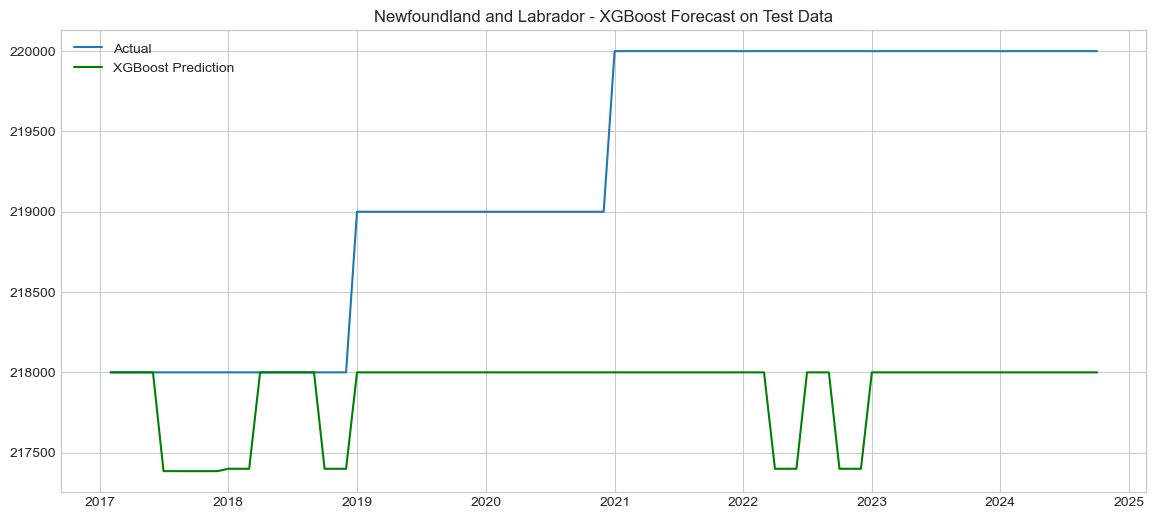

Best model for Newfoundland and Labrador based on RMSE: XGBoost


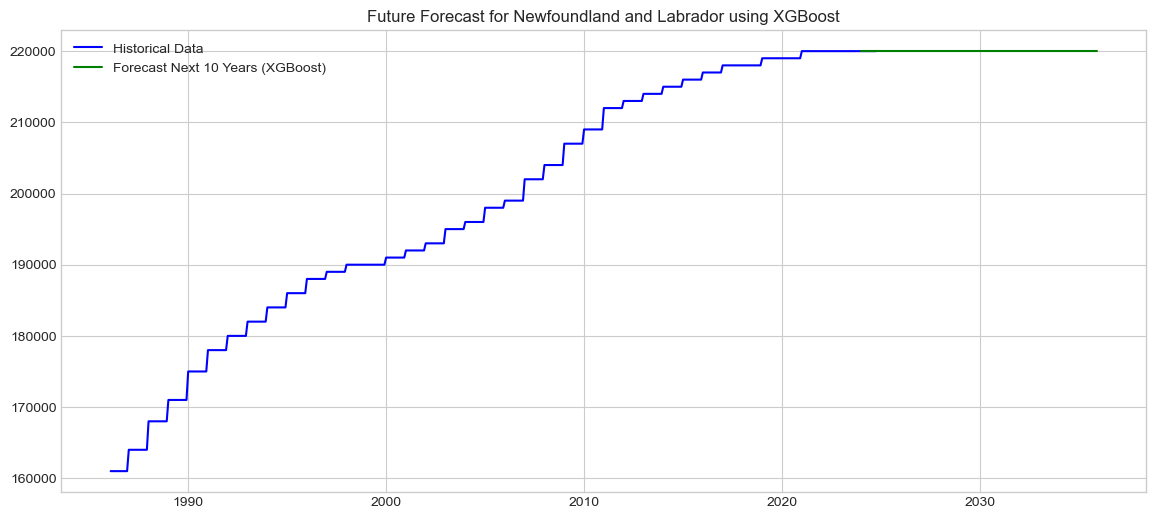


Processing province: Ontario


17:06:21 - cmdstanpy - INFO - Chain [1] start processing
17:06:22 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 31270.65


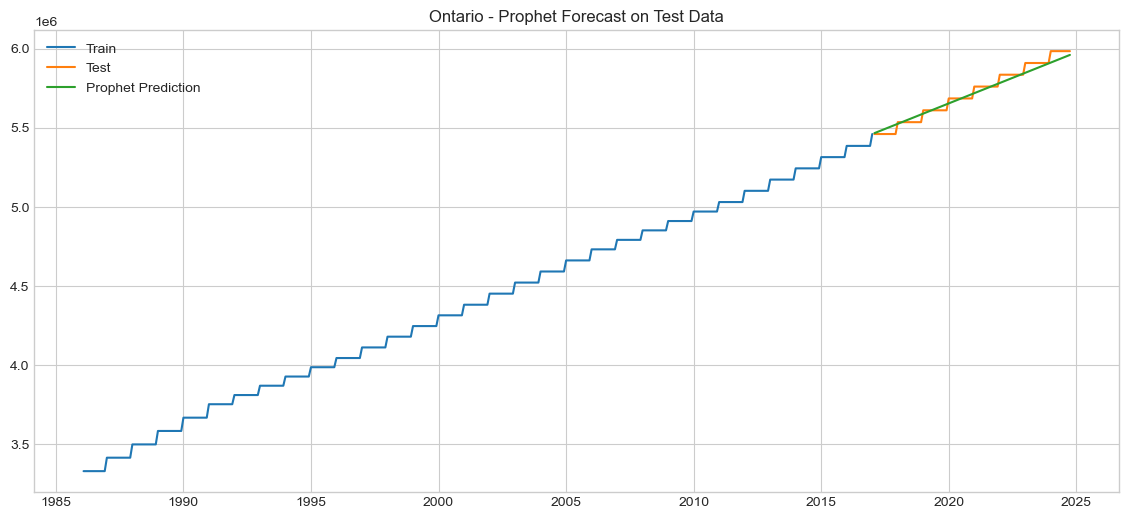

Random Forest RMSE: 347988.30


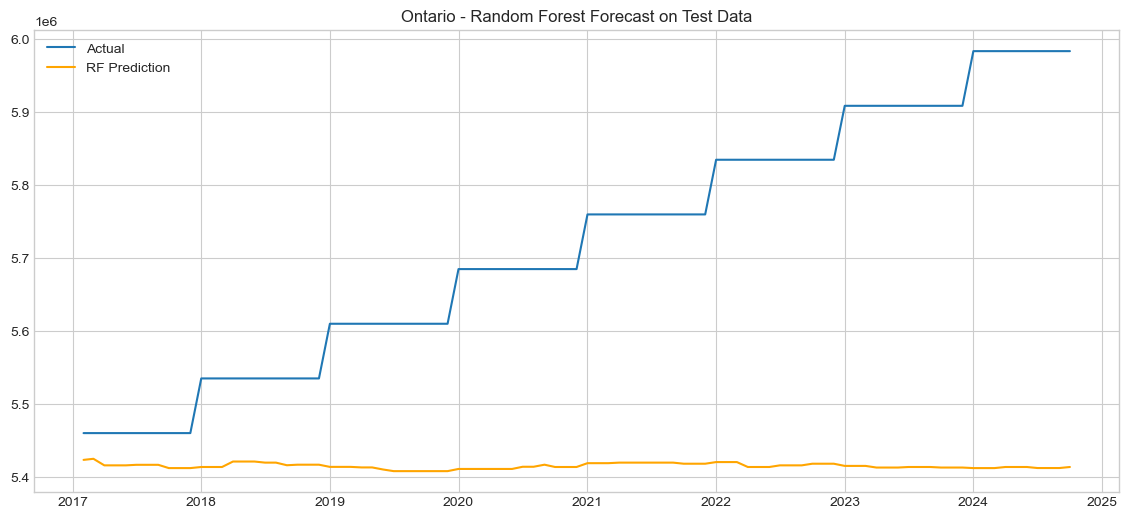

XGBoost RMSE: 352951.62


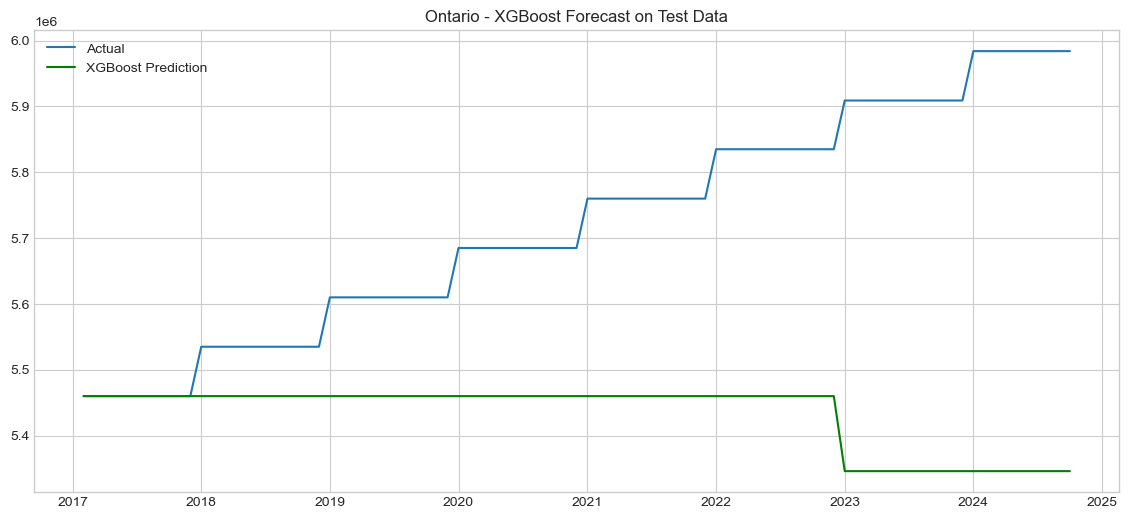

Best model for Ontario based on RMSE: Prophet


17:06:32 - cmdstanpy - INFO - Chain [1] start processing
17:06:33 - cmdstanpy - INFO - Chain [1] done processing


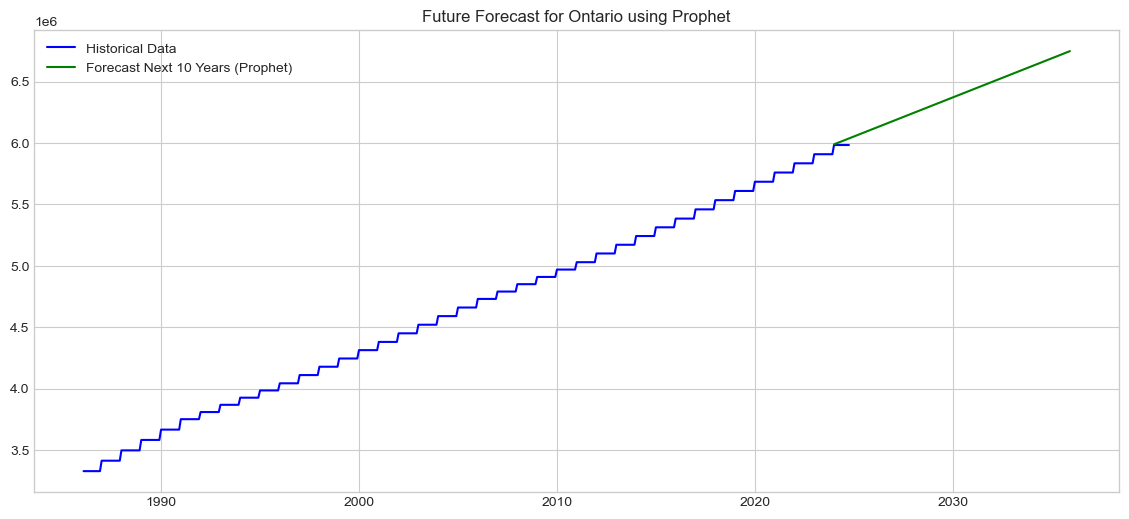

Evaluation metrics saved to 'provincial_model_evaluation_metrics.csv'.
Provincial forecasts saved to 'provincial_forecasts_next_10_years.csv'.


In [27]:
# %% [code]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prophet (install via: pip install prophet)
from prophet import Prophet

# ML models
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set global plotting style
plt.rcParams['figure.figsize'] = (14,6)
plt.style.use('seaborn-whitegrid')

# -------------------------------
# 1. DATA LOADING & EXPLORATION
# -------------------------------

# Load the CSV file
df = pd.read_csv("Trimmed_Time_Series_Data after Feature Engineering.csv")

# Convert 'REF_DATE' to datetime and set as index
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df.set_index('REF_DATE', inplace=True)
df.sort_index(inplace=True)

print("Data Information:")
print(df.info())
print("\nData Head:")
print(df.head())

# -------------------------------
# 2. FORECASTING PIPELINE PER PROVINCE
# -------------------------------

# Define the fixed future forecast horizon:
# Forecast period: January 1, 2024 to December 1, 2035 (monthly data)
future_index = pd.date_range(start='2024-01-01', end='2035-12-01', freq='MS')
future_periods = len(future_index)  # e.g., 144 periods for 12 years

# Lists to store future forecasts and evaluation metrics for each province.
provincial_future_forecasts = []
province_metrics = {}

# Get unique provinces from the "GEO" column.
provinces = df['GEO'].unique()

for prov in provinces:
    print("\n===================================")
    print(f"Processing province: {prov}")
    
    # Subset the data for the current province
    prov_df = df[df['GEO'] == prov].copy().sort_index()
    
    # Skip province if there is not enough data.
    if len(prov_df) < 50:
        print(f"Not enough data for province {prov}. Skipping.")
        continue
    
    # Split the province data into training (80%) and testing (20%) sets.
    n = len(prov_df)
    split_idx = int(n * 0.8)
    train_df = prov_df.iloc[:split_idx]
    test_df  = prov_df.iloc[split_idx:]
    
    # For ML models, define target and exogenous predictors:
    # Use all columns except 'Number_of_Households' (target) and 'GEO'
    y_train = train_df['Number_of_Households']
    y_test  = test_df['Number_of_Households']
    X_train = train_df.drop(['Number_of_Households', 'GEO'], axis=1)
    X_test  = test_df.drop(['Number_of_Households', 'GEO'], axis=1)
    
    # For Prophet, reformat data: rename index column to 'ds' and target to 'y'
    prophet_df = prov_df.reset_index().rename(columns={'REF_DATE': 'ds', 'Number_of_Households': 'y'})
    # Identify extra regressors: all columns except 'ds', 'y', and 'GEO'
    exog_cols = [col for col in prophet_df.columns if col not in ['ds', 'y', 'GEO']]
    train_prophet = prophet_df.iloc[:split_idx].copy()
    test_prophet  = prophet_df.iloc[split_idx:].copy()
    
    # Dictionary to store evaluation metrics for each model for this province.
    metrics = {}
    
    # -------------------------------
    # Model 1: Prophet with Extra Regressors
    # -------------------------------
    try:
        m = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
        for col in exog_cols:
            m.add_regressor(col)
        m.fit(train_prophet)
        
        # Create a future dataframe for the test period (same length as test_prophet)
        future_test = m.make_future_dataframe(periods=len(test_prophet), freq='MS')
        # For each extra regressor, fill future periods with the last observed training value
        for col in exog_cols:
            future_test[col] = train_prophet[col].iloc[-1]
        forecast_prophet = m.predict(future_test)
        # Extract Prophet predictions corresponding to the test period.
        prophet_pred = forecast_prophet.iloc[-len(test_prophet):]['yhat'].values
        
        rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], prophet_pred))
        mae_prophet  = mean_absolute_error(test_prophet['y'], prophet_pred)
        r2_prophet   = r2_score(test_prophet['y'], prophet_pred)
        metrics['Prophet'] = {'RMSE': rmse_prophet, 'MAE': mae_prophet, 'R2': r2_prophet}
        print(f"Prophet RMSE: {rmse_prophet:.2f}")
        
        # Visualization for Prophet on test set.
        plt.figure()
        plt.plot(train_prophet['ds'], train_prophet['y'], label='Train')
        plt.plot(test_prophet['ds'], test_prophet['y'], label='Test')
        plt.plot(future_test['ds'].iloc[-len(test_prophet):], prophet_pred, label='Prophet Prediction')
        plt.title(f"{prov} - Prophet Forecast on Test Data")
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"Prophet error for {prov}: {e}")
        metrics['Prophet'] = {'RMSE': np.inf, 'MAE': np.inf, 'R2': -np.inf}
    
    # -------------------------------
    # Model 2: Random Forest (using all features)
    # -------------------------------
    try:
        rf = RandomForestRegressor(random_state=42)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict(X_test)
        rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
        mae_rf  = mean_absolute_error(y_test, rf_pred)
        r2_rf   = r2_score(y_test, rf_pred)
        metrics['RandomForest'] = {'RMSE': rmse_rf, 'MAE': mae_rf, 'R2': r2_rf}
        print(f"Random Forest RMSE: {rmse_rf:.2f}")
        
        plt.figure()
        plt.plot(y_test.index, y_test, label='Actual')
        plt.plot(y_test.index, rf_pred, label='RF Prediction', color='orange')
        plt.title(f"{prov} - Random Forest Forecast on Test Data")
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"Random Forest error for {prov}: {e}")
        metrics['RandomForest'] = {'RMSE': np.inf, 'MAE': np.inf, 'R2': -np.inf}
    
    # -------------------------------
    # Model 3: XGBoost (using all features)
    # -------------------------------
    try:
        xgb_model = xgb.XGBRegressor(random_state=42)
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict(X_test)
        rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))
        mae_xgb  = mean_absolute_error(y_test, xgb_pred)
        r2_xgb   = r2_score(y_test, xgb_pred)
        metrics['XGBoost'] = {'RMSE': rmse_xgb, 'MAE': mae_xgb, 'R2': r2_xgb}
        print(f"XGBoost RMSE: {rmse_xgb:.2f}")
        
        plt.figure()
        plt.plot(y_test.index, y_test, label='Actual')
        plt.plot(y_test.index, xgb_pred, label='XGBoost Prediction', color='green')
        plt.title(f"{prov} - XGBoost Forecast on Test Data")
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"XGBoost error for {prov}: {e}")
        metrics['XGBoost'] = {'RMSE': np.inf, 'MAE': np.inf, 'R2': -np.inf}
    
    province_metrics[prov] = metrics
    
    # Select best model based on RMSE
    best_model = min(metrics.items(), key=lambda x: x[1]['RMSE'])[0]
    print(f"Best model for {prov} based on RMSE: {best_model}")
    
    # -------------------------------
    # Retrain best model on full data and forecast next 10 years
    # -------------------------------
    y_full = prov_df['Number_of_Households']
    X_full = prov_df.drop(['Number_of_Households', 'GEO'], axis=1)
    last_exog_full = X_full.iloc[-1]
    
    # Use the fixed future index (2024-01-01 to 2035-12-01)
    future_index = future_index  # already defined above
    # Create future exogenous data: assume constant (last observed) values.
    future_exog = pd.DataFrame(np.tile(last_exog_full.values, (len(future_index), 1)),
                               columns=last_exog_full.index, index=future_index)
    
    if best_model == 'Prophet':
        full_prophet = prov_df.reset_index().rename(columns={'REF_DATE': 'ds', 'Number_of_Households': 'y'})
        m_full = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
        for col in exog_cols:
            m_full.add_regressor(col)
        m_full.fit(full_prophet)
        future_full = m_full.make_future_dataframe(periods=len(future_index), freq='MS')
        for col in exog_cols:
            future_full[col] = last_exog_full[col]
        forecast_full = m_full.predict(future_full)
        future_forecast = forecast_full.iloc[-len(future_index):]['yhat']
        future_forecast.index = future_index
        best_model_used = 'Prophet'
    elif best_model == 'RandomForest':
        rf_full = RandomForestRegressor(random_state=42)
        rf_full.fit(X_full, y_full)
        future_forecast_values = rf_full.predict(future_exog)
        future_forecast = pd.Series(future_forecast_values, index=future_index)
        best_model_used = 'RandomForest'
    elif best_model == 'XGBoost':
        xgb_full = xgb.XGBRegressor(random_state=42)
        xgb_full.fit(X_full, y_full)
        future_forecast_values = xgb_full.predict(future_exog)
        future_forecast = pd.Series(future_forecast_values, index=future_index)
        best_model_used = 'XGBoost'
    
    plt.figure()
    plt.plot(y_full.index, y_full, label="Historical Data", color="blue")
    plt.plot(future_forecast.index, future_forecast, label=f"Forecast Next 10 Years ({best_model_used})", color="green")
    plt.title(f"Future Forecast for {prov} using {best_model_used}")
    plt.legend()
    plt.show()
    
    forecast_df = pd.DataFrame({
        "Date": future_forecast.index,
        "GEO": prov,
        "Number_of_Houses": future_forecast.values,
    })
    provincial_future_forecasts.append(forecast_df)

# -------------------------------
# SAVE RESULTS TO CSV
# -------------------------------

# Save evaluation metrics for each province.
metrics_list = []
for prov, models in province_metrics.items():
    for model_name, m in models.items():
        metrics_list.append({
            "Province": prov,
            "Model": model_name,
            "RMSE": m['RMSE'],
            "MAE": m['MAE'],
            "R2": m['R2']
        })
metrics_df = pd.DataFrame(metrics_list)
metrics_df.to_csv("provincial_model_evaluation_metrics.csv", index=False)
print("Evaluation metrics saved to 'provincial_model_evaluation_metrics.csv'.")

# Concatenate all future forecasts and save to CSV.
if provincial_future_forecasts:
    final_forecast = pd.concat(provincial_future_forecasts, ignore_index=True)
    final_forecast.to_csv("provincial_forecasts_next_10_years.csv", index=False)
    print("Provincial forecasts saved to 'provincial_forecasts_next_10_years.csv'.")
else:
    print("No forecasts were generated.")
